In [4]:
import numpy as np
import matplotlib.pyplot as plt

mass_organization = [0, 50, 100, 200, 300, 400, 500]

wood_newtons = [0.6, 0.8, 1.0, 1.3, 1.7, 2.0, 2.4]
dwood_newtons = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2]

fabric_newtons = [0.7, 0.8, 0.9, 1.2, 1.4, 1.7, 1.9]
dfabric_newtons = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

weight = [elemento*9.77*10**-3 + 2.3 for elemento in mass_organization]

# Imprimir la lista modificada
print(weight)

[2.3, 2.7885, 3.2769999999999997, 4.254, 5.231, 6.208, 7.185]


El coeficiente de fricción dinámica está dado por:

$$ F = \mu_{D}\ N $$
$$ F = \frac{\mu_{D}}{M\ g}

Despejando tenemos:

$$ \mu_{D} = \frac{F}{M\ g} $$

In [5]:
# Calculo del coeficiente de friccion dinámica

def coef_din(masa_bloque, fuerza, dfuerza):
    coef = fuerza / (masa_bloque * 9.8)
    dcoef = 
    return coef, dcoef

SyntaxError: invalid syntax (1593504215.py, line 5)

# Calculando la masa (en gramos)


In [6]:
# lado madera

masas = []

for i in range(len(wood_newtons)):
    for j in range(i+1, len(wood_newtons)):  # Iteramos sobre los índices restantes para evitar duplicados
        m = ((wood_newtons[i]*mass_organization[j])-(wood_newtons[j]*mass_organization[i]))/(wood_newtons[j]-wood_newtons[i])
        
        masas.append(m)

print(masas)

[149.99999999999994, 150.0, 171.42857142857142, 163.63636363636363, 171.42857142857144, 166.66666666666669, 150.00000000000003, 190.0, 172.22222222222223, 183.33333333333334, 175.00000000000003, 233.3333333333333, 185.71428571428572, 200.0, 185.71428571428572, 125.00000000000003, 171.42857142857144, 154.54545454545456, 266.66666666666663, 185.71428571428572, 100.00000000000003]


(array([ 2.,  5., 11.,  2.,  1.]),
 array([100.        , 133.33333333, 166.66666667, 200.        ,
        233.33333333, 266.66666667]),
 <BarContainer object of 5 artists>)

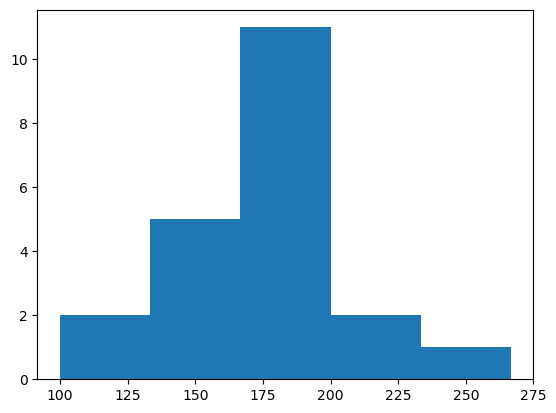

In [7]:
plt.hist(masas, bins = 5)

In [8]:
# lado tela

masac = []

for i in range(len(wood_newtons)):
    for j in range(i+1, len(wood_newtons)):  # Iteramos sobre los índices restantes para evitar duplicados
        m = ((fabric_newtons[i]*mass_organization[j])-(fabric_newtons[j]*mass_organization[i]))/(fabric_newtons[j]-fabric_newtons[i])
        
        masac.append(m)

print(masac)

[349.9999999999997, 349.9999999999999, 280.0, 300.0, 280.0, 291.6666666666667, 350.00000000000006, 250.00000000000006, 283.33333333333337, 261.11111111111114, 277.2727272727273, 200.00000000000006, 260.00000000000006, 237.50000000000003, 260.00000000000006, 400.0000000000001, 280.0, 314.2857142857143, 166.66666666666663, 260.0, 450.0000000000001]


(array([2., 7., 7., 3., 2.]),
 array([166.66666667, 223.33333333, 280.        , 336.66666667,
        393.33333333, 450.        ]),
 <BarContainer object of 5 artists>)

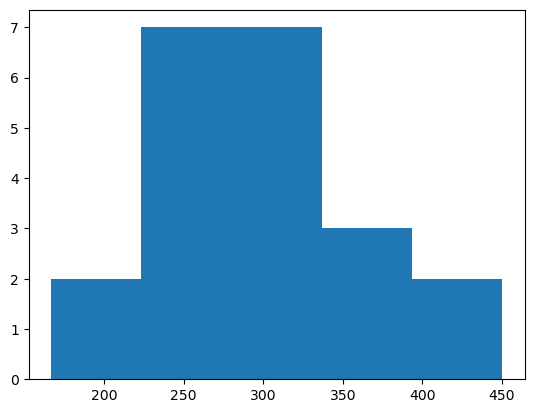

In [9]:
plt.hist(masac, bins = 5)

El promedio es: 232.23 
La desviación estándar es: 76.77 


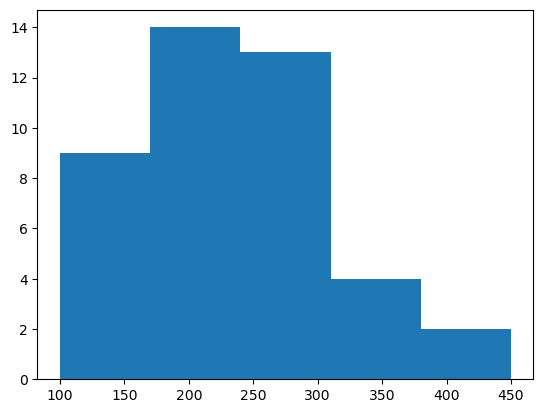

In [10]:
masa = [masas + masac]

plt.hist(masa, bins = 5)

print("El promedio es: %.2f " %np.mean(masa))
print("La desviación estándar es: %.2f " %np.std(masa))

# Gráfica

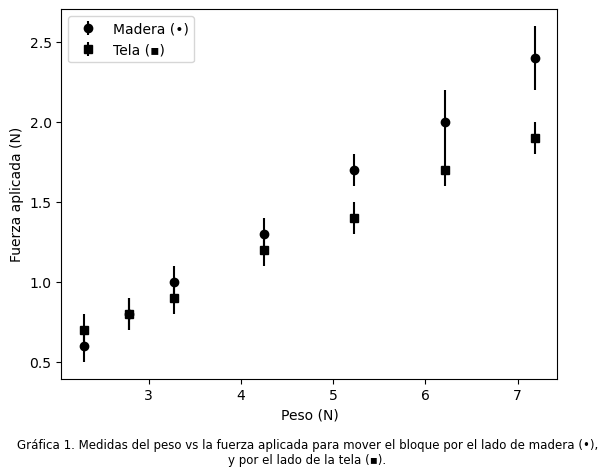

In [11]:
plt.errorbar(weight, wood_newtons, color = 'black', yerr= dwood_newtons, fmt='o', label= 'Madera (•)')
plt.errorbar(weight, fabric_newtons, color = 'black', yerr= dfabric_newtons, fmt='s',label='Tela (▪)')

plt.xlabel('Peso (N)')
plt.ylabel('Fuerza aplicada (N)')
plt.title('Gráfica 1. Medidas del peso vs la fuerza aplicada para mover el bloque por el lado de madera (•), \ny por el lado de la tela (▪). ', y = -0.25, fontsize = 8.5)

plt.legend()

plt.show()

0.36190749001785083 -0.21532238062467424
0.2522173820394674 0.10283517489284287


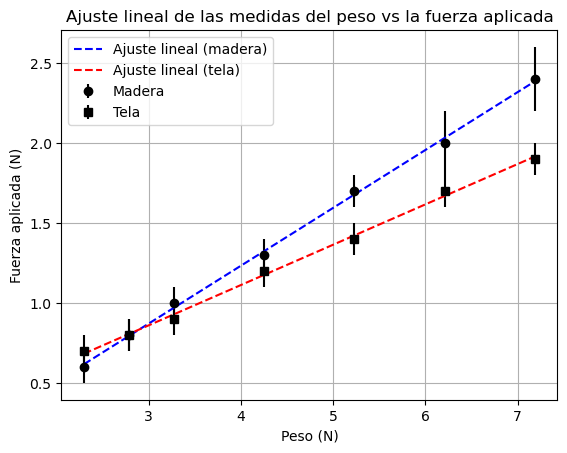

In [15]:
# Gráfica de puntos con barras de error
plt.errorbar(weight, wood_newtons, color='black', yerr=dwood_newtons, fmt='o', label='Madera')
plt.errorbar(weight, fabric_newtons, color='black', yerr=dfabric_newtons, fmt='s', label='Tela')

# Etiquetas y título
plt.xlabel('Peso (N)')
plt.ylabel('Fuerza aplicada (N)')
plt.title('Ajuste lineal de las medidas del peso vs la fuerza aplicada')

# Ajuste lineal para madera
m1, b1 = np.polyfit(weight, wood_newtons, 1)
plt.plot(weight, m1 * np.array(weight) + b1, color='blue', linestyle='--', label='Ajuste lineal (madera)')

# Ajuste lineal para tela
m2, b2 = np.polyfit(weight, fabric_newtons, 1)
plt.plot(weight, m2 * np.array(weight) + b2, color='red', linestyle='--', label='Ajuste lineal (tela)')

# Leyenda
plt.legend()
plt.grid()
plt.savefig('ajuste_lineal_peso-fuerza.png', dpi=300)
print(m1, b1)
print(m2, b2)